Image_Augmentation_Pipeline_Visualization

In [1]:
!pip install torchvision matplotlib pillow
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import urllib.request
from io import BytesIO


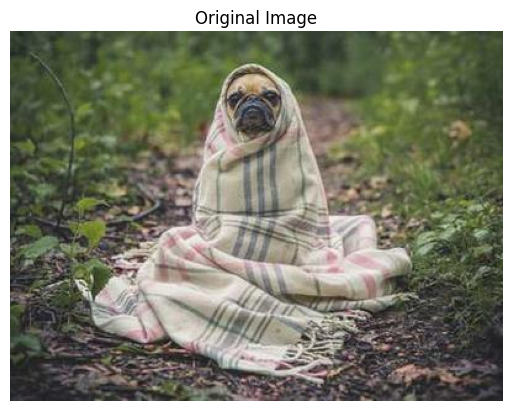

In [3]:
url = "https://picsum.photos/id/1025/400/300"
image = Image.open(BytesIO(urllib.request.urlopen(url).read())).convert("RGB")

plt.imshow(image)
plt.axis("off")
plt.title("Original Image")
plt.show()


In [4]:
transform_pipeline = T.Compose([
    T.RandomHorizontalFlip(p=1.0),         # Flip horizontally
    T.RandomRotation(30),                  # Rotate within ±30°
    T.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4), # Adjust color
    T.RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0)),       # Random crop
    T.RandomPerspective(distortion_scale=0.4, p=1.0),             # Perspective warp
    T.GaussianBlur(kernel_size=(5,5)),     # Blur effect
])


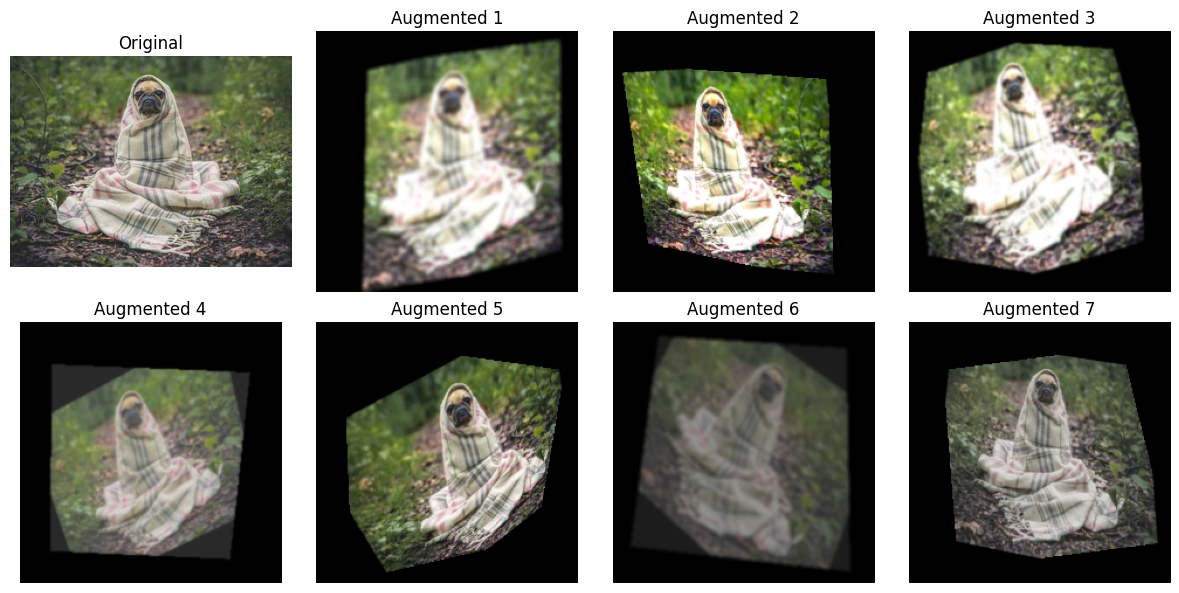

In [5]:
fig, axes = plt.subplots(2, 4, figsize=(12,6))
axes = axes.flatten()

axes[0].imshow(image)
axes[0].set_title("Original")
axes[0].axis("off")

# Generate 7 augmented versions
for i in range(1,8):
    augmented = transform_pipeline(image)
    axes[i].imshow(augmented)
    axes[i].set_title(f"Augmented {i}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()
